In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

data = train_data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 학습 데이터에서 결측값 확인
data.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


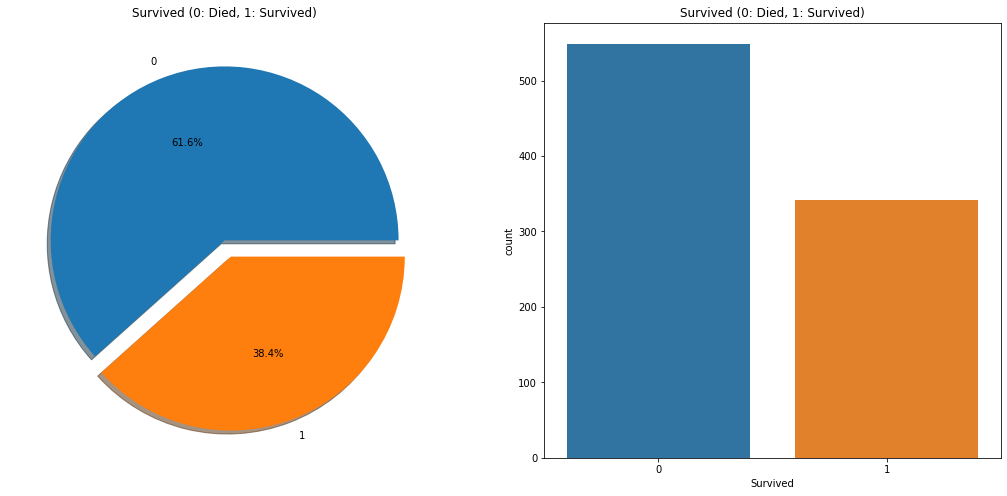

In [3]:
# 전체 생존율 확인
f,ax=plt.subplots(1,2,figsize=(18,8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived (0: Died, 1: Survived)')
ax[0].set_ylabel('')

sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived (0: Died, 1: Survived)')
plt.show()

In [4]:
# 성별에 따른 생존율 확인
pd.crosstab([data['Survived']],data['Sex'],margins=True).style.background_gradient(cmap='summer_r')

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


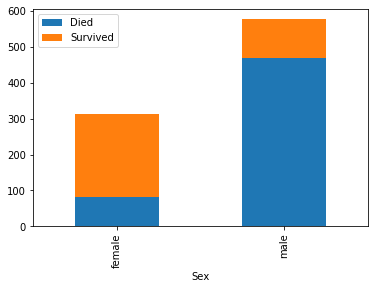

In [5]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Died','Survived']].plot(kind='bar',stacked=True)
plt.show()

In [6]:
# 객실 등급에 따른 생존율 확인
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

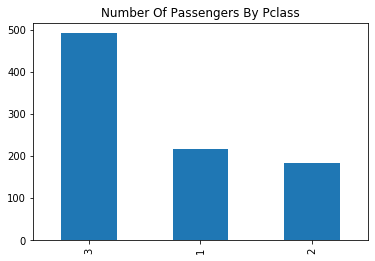

In [7]:
plt.plot(figsize=(18,8))

data['Pclass'].value_counts().plot.bar()
plt.title('Number Of Passengers By Pclass')
plt.show()

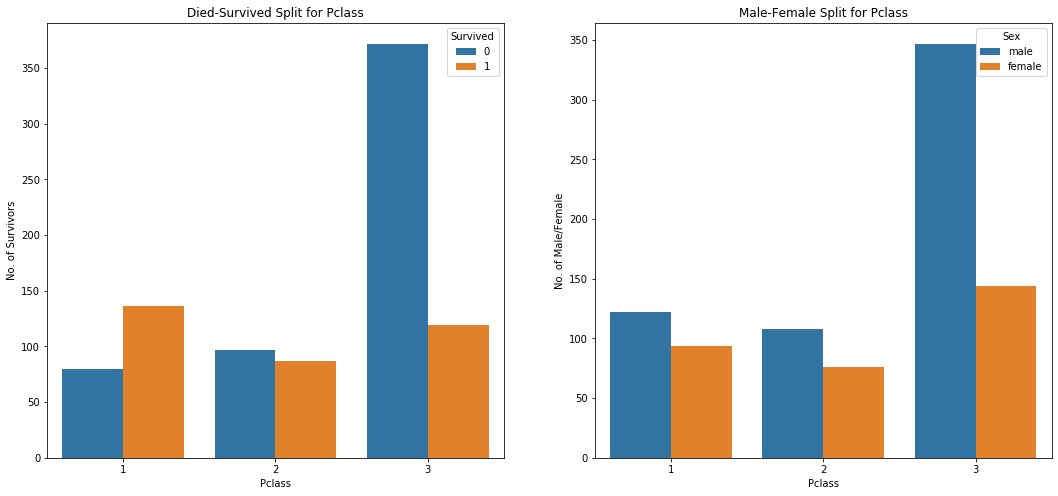

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.countplot('Pclass',hue='Survived',data=data,ax=ax[0])
ax[0].set_title('Died-Survived Split for Pclass')
ax[0].set_ylabel('No. of Survivors')

sns.countplot('Pclass',hue='Sex',data=data,ax=ax[1])
ax[1].set_title('Male-Female Split for Pclass')
ax[1].set_ylabel('No. of Male/Female')

plt.show()
plt.show()

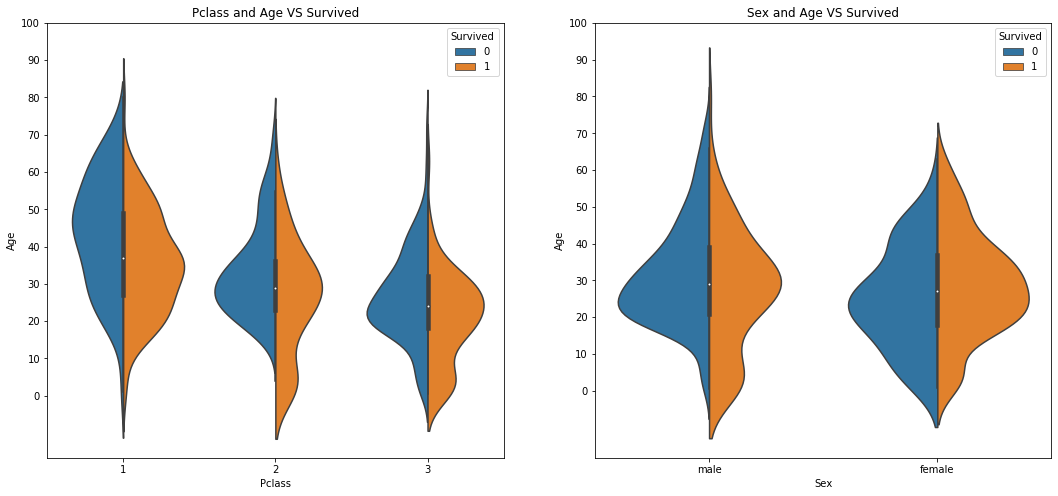

In [9]:
# 나이에 따른 생존율 확인-1 (결측값 처리 전)
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [10]:
data['Age'].describe().to_frame()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [11]:
# Age 특성 결측값 처리
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

print(data['Initial'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [12]:
data['Initial'].to_frame()

,Initial
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [13]:
data['Name'].to_frame()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [14]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
# 기존 17개의 호칭을 4개의 호칭으로 나이에 따라 정리함
data['Initial'].replace(['Sir', 'Dr', 'Don', 'Capt', 'Jonkheer', 'Rev', 'Col', 'Major', 'Mme', 'Countess', 'Lady', 'Mlle', 'Ms'],['Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Miss'],inplace=True)
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs
Sex,,,,
female,0,186,1,127
male,40,0,537,0


In [16]:
data.groupby('Initial')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Initial,,,,,,,,
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.0,12.0
Miss,150.0,22.020000,13.003824,0.75,14.625,21.5,30.0,63.0
Mr,418.0,33.022727,12.996267,11.00,23.000,30.0,40.0,80.0
Mrs,110.0,35.763636,11.388009,14.00,27.250,35.0,44.0,63.0


In [17]:
# Age 특성이 null값인 샘플에 대해 호칭에 따라 나이를 새로 넣어줌
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22

In [18]:
# 전처리 후 결측값 있는지 확인
data.Age.isnull().any()
data.Age.isnull().sum()

0

In [19]:
data['Age'].max()

80.0

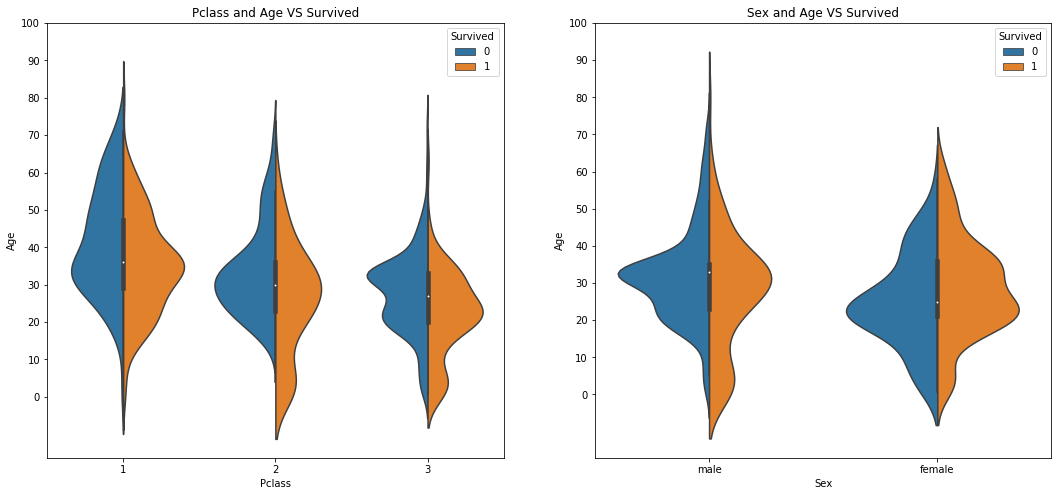

In [20]:
# 나이에 따른 생존율 확인-2 (결측값 처리 후)
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [21]:
data['Embarked'].value_counts().to_frame()

,Embarked
S,644
C,168
Q,77


In [22]:
# Embarked 특성 결측값 처리
data['Embarked'].fillna('S',inplace=True)

In [23]:
# 전처리 후 결측값 있는지 확인
data.Embarked.isnull().any()
data.Embarked.isnull().sum()

0

In [24]:
# 탑승 항구에 따른 생존율 확인
pd.crosstab([data['Pclass'],data['Sex'],data['Survived']],data['Embarked'],margins=True).style.background_gradient(cmap='summer_r')

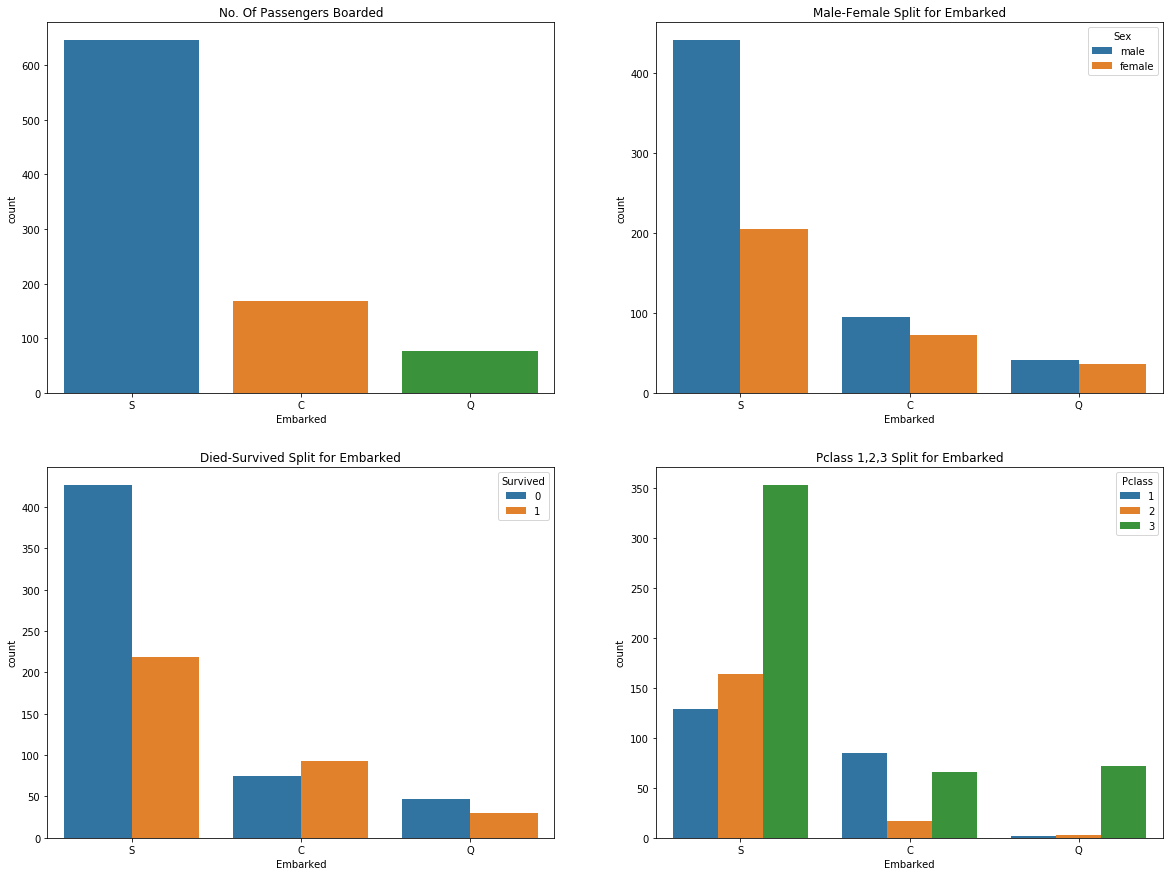

In [25]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Died-Survived Split for Embarked')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Pclass 1,2,3 Split for Embarked')
plt.show()

### 전처리를 통한 새로운 특성 생성

In [26]:
# 연속형 데이터 Age를 5 구간의 범주형 데이터로 바꿔준다
data['Age_band']=0

data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,2


In [27]:
data['Age_band'].value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


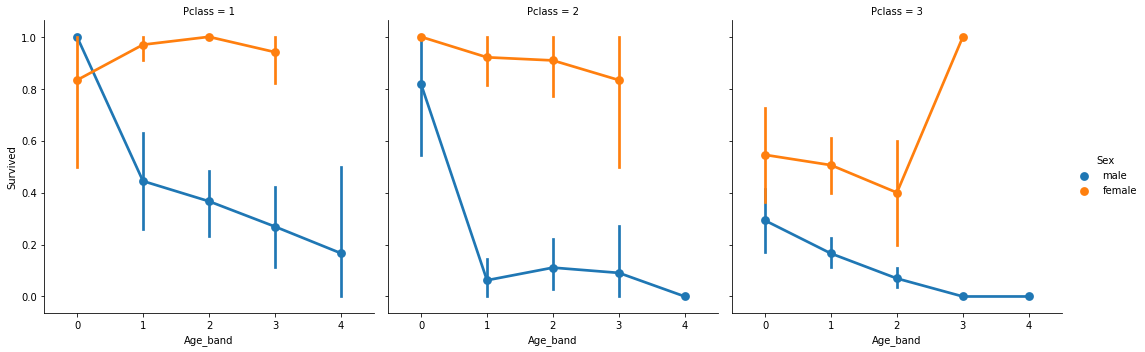

In [36]:
sns.factorplot('Age_band','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [29]:
# 연속형 데이터 Fare를 4 구간의 범주형 데이터로 바꿔준다
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [30]:
data['Fare_new']=0

data.loc[data['Fare']<=7.91,'Fare_new']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_new']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_new']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_new']=3

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Initial,Age_band,Fare_Range,Fare_new
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr,2,"(7.91, 14.454]",1


In [31]:
data['Fare_new'].value_counts().to_frame()

,Fare_new
2,229
0,223
3,222
1,217


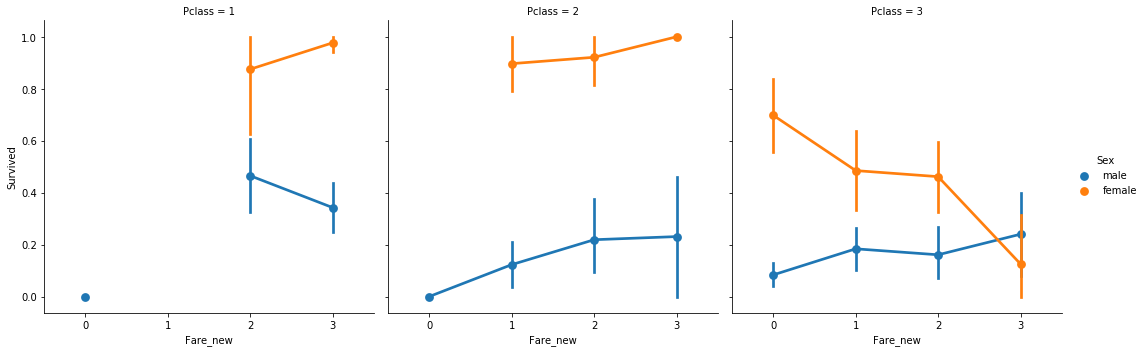

In [32]:
sns.factorplot('Fare_new','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

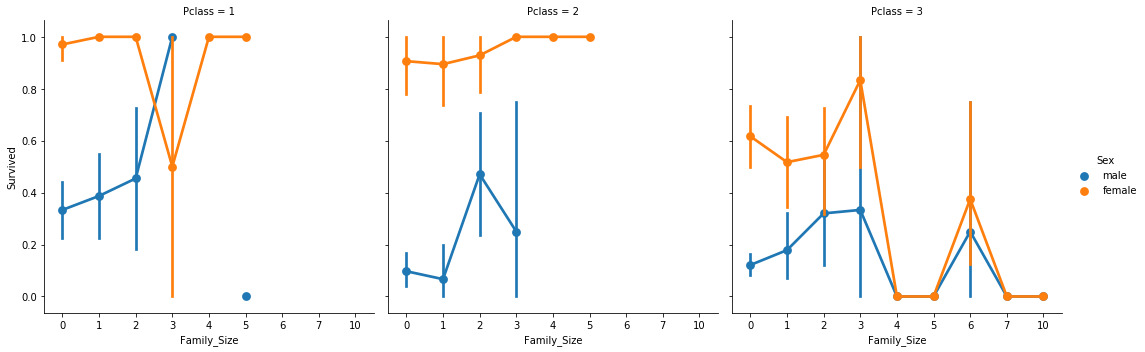

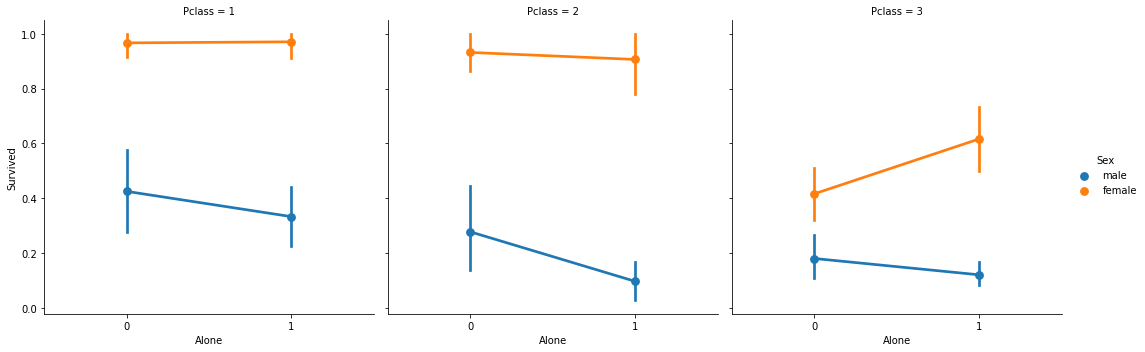

In [33]:
# 두 개의 상호 연관성이 있는 특성들을 합쳐서 하나의 특성으로 만든다
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
sns.factorplot('Family_Size','Survived',data=data, hue='Sex', col='Pclass')

data['Alone'] = 0
data.loc[data.Family_Size==0,'Alone']=1
sns.factorplot('Alone','Survived',data=data, hue='Sex', col='Pclass')

plt.show()

In [34]:
data['Family_Size'].value_counts().to_frame()

,Family_Size
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In [35]:
data['Family_Size'].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)